In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/liver-cancer-data.csv')

In [3]:
df.head() 

,Y_sono_three_times_or_more,male,diabetes,hypertension,CKD,viral_hepatitis,gall_bladder_diseases,KUB_diseases,pancreas_diseases,chronic_hepatitis_except_viral_hepatitis,other,abdominal_pain,central_area_in_Taiwan
0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,1,0,1,0,1,0,0,0,0,1
2,1,1,0,1,0,0,1,1,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0


In [4]:
df.shape

(4621, 13)

In [5]:
df['three_times_or_more'] = df['Y_sono_three_times_or_more'] 
df.drop('Y_sono_three_times_or_more', axis=1, inplace=True) 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4621.0,0.711318,0.453199,0.0,0.0,1.0,1.0,1.0
diabetes,4621.0,0.155594,0.362509,0.0,0.0,0.0,0.0,1.0
hypertension,4621.0,0.403376,0.490628,0.0,0.0,0.0,1.0,1.0
CKD,4621.0,0.109933,0.312840,0.0,0.0,0.0,0.0,1.0
viral_hepatitis,4621.0,0.558321,0.496641,0.0,0.0,1.0,1.0,1.0
gall_bladder_diseases,4621.0,0.365722,0.481684,0.0,0.0,0.0,1.0,1.0
KUB_diseases,4621.0,0.200822,0.400659,0.0,0.0,0.0,0.0,1.0
pancreas_diseases,4621.0,0.058645,0.234985,0.0,0.0,0.0,0.0,1.0
chronic_hepatitis_except_viral_hepatitis,4621.0,0.337589,0.472939,0.0,0.0,0.0,1.0,1.0
other,4621.0,0.385198,0.486695,0.0,0.0,0.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   male                                      4621 non-null   int64
 1   diabetes                                  4621 non-null   int64
 2   hypertension                              4621 non-null   int64
 3   CKD                                       4621 non-null   int64
 4   viral_hepatitis                           4621 non-null   int64
 5   gall_bladder_diseases                     4621 non-null   int64
 6   KUB_diseases                              4621 non-null   int64
 7   pancreas_diseases                         4621 non-null   int64
 8   chronic_hepatitis_except_viral_hepatitis  4621 non-null   int64
 9   other                                     4621 non-null   int64
 10  abdominal_pain                            4621 non-null   in

In [8]:
df.isna().sum()

,0
male,0
diabetes,0
hypertension,0
CKD,0
viral_hepatitis,0
gall_bladder_diseases,0
KUB_diseases,0
pancreas_diseases,0
chronic_hepatitis_except_viral_hepatitis,0
other,0


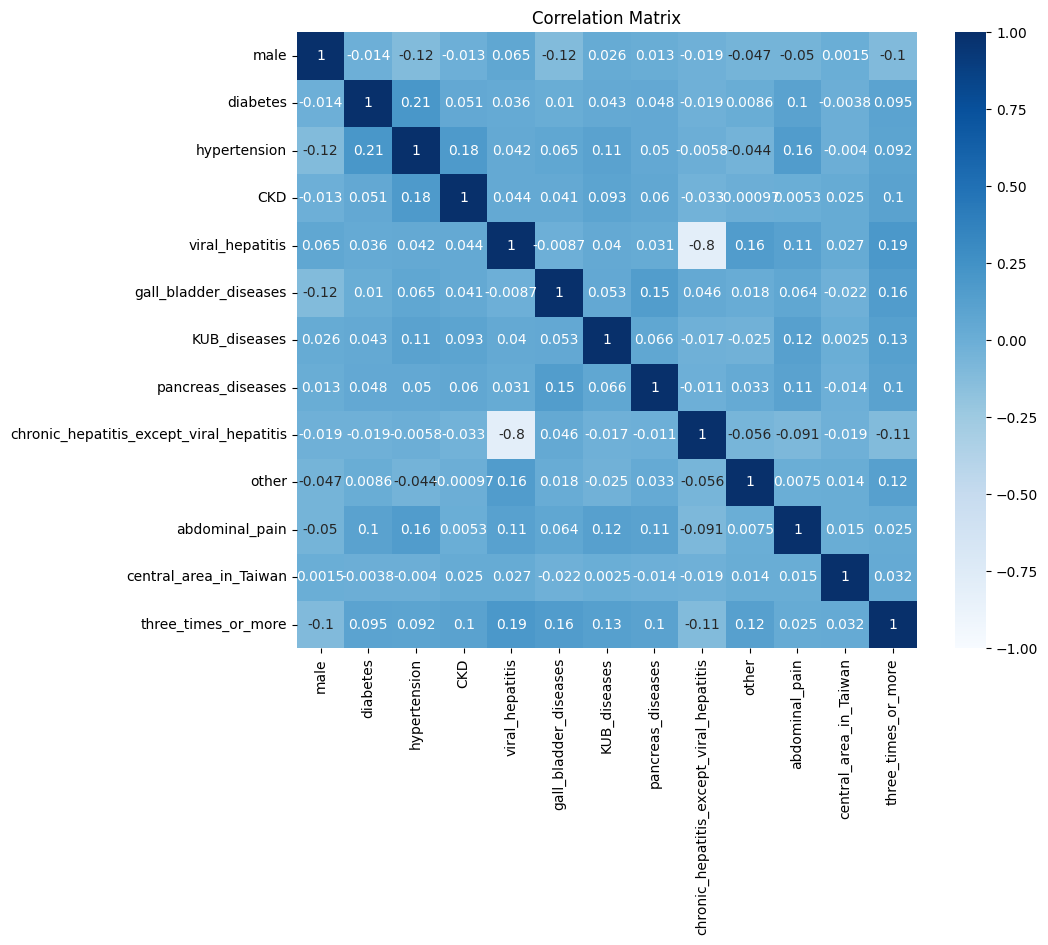

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

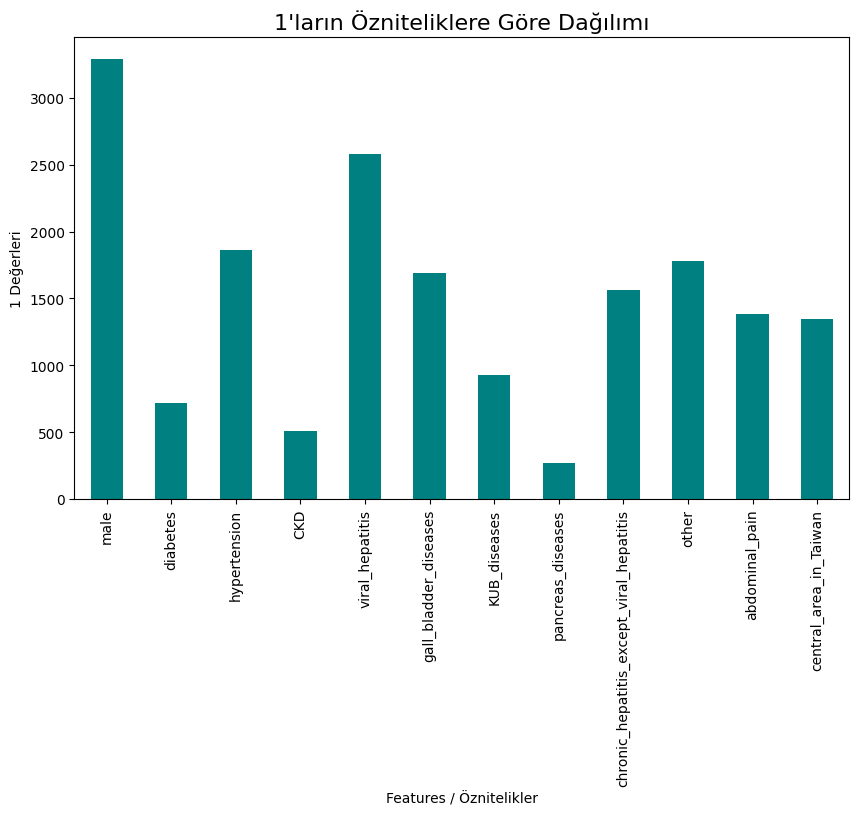

In [10]:
# Plot histogram of binary features
df.drop(columns=['three_times_or_more']).sum().plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Distribution of Ones According to Attributes ", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Ones")
plt.show()

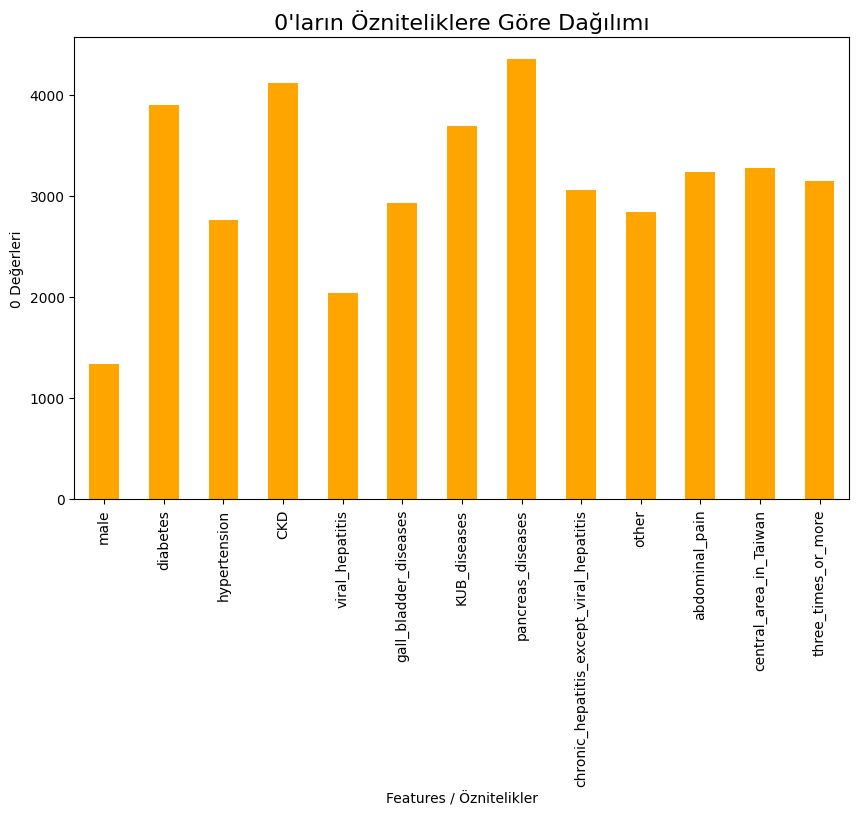

In [11]:
zeros_count = (df == 0).sum()
zeros_count.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Distribution of Zeros According to Attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Zeros")
plt.show()

<Axes: xlabel='three_times_or_more', ylabel='count'>

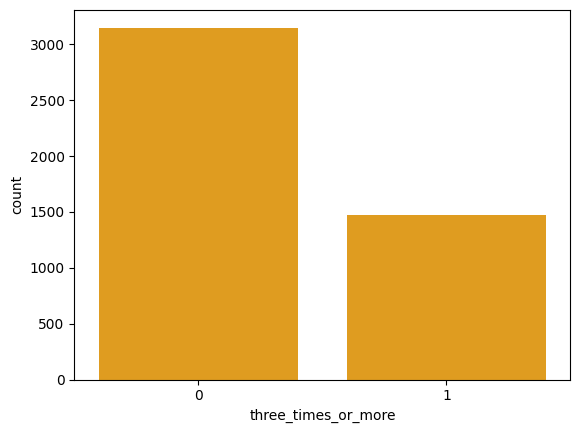

In [12]:
sns.countplot(x=df['three_times_or_more'],data=df, color='orange', legend=False)

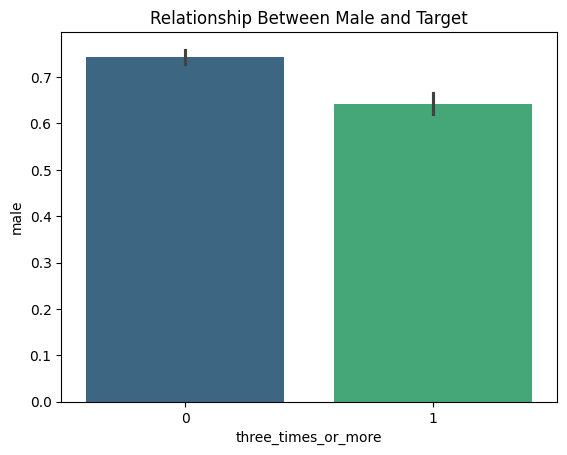

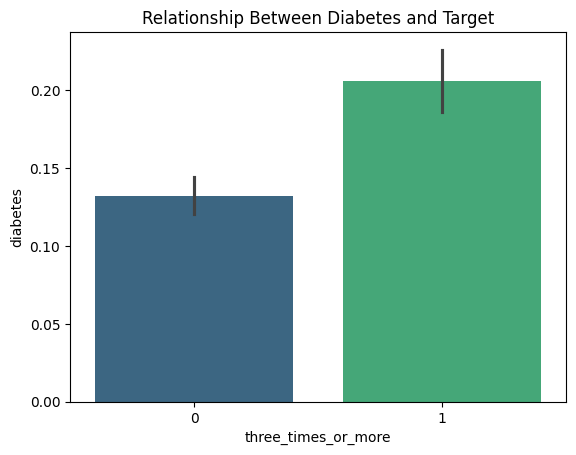

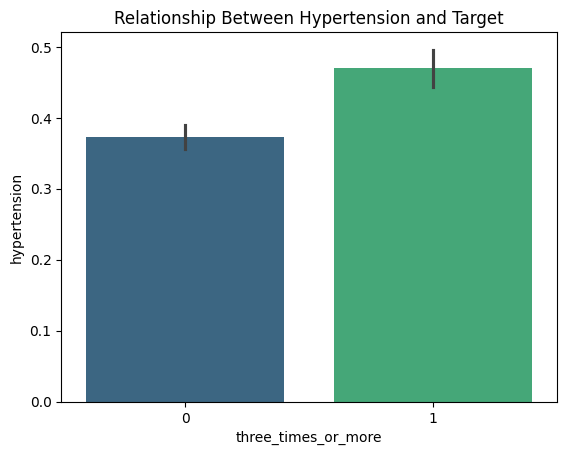

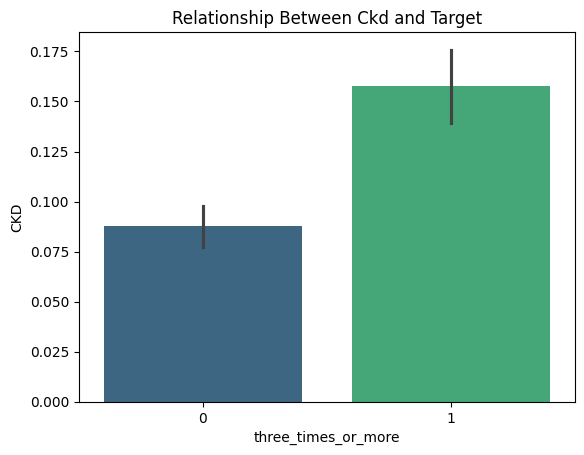

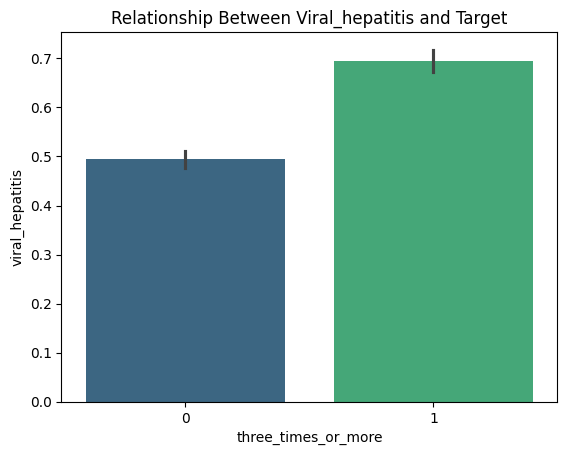

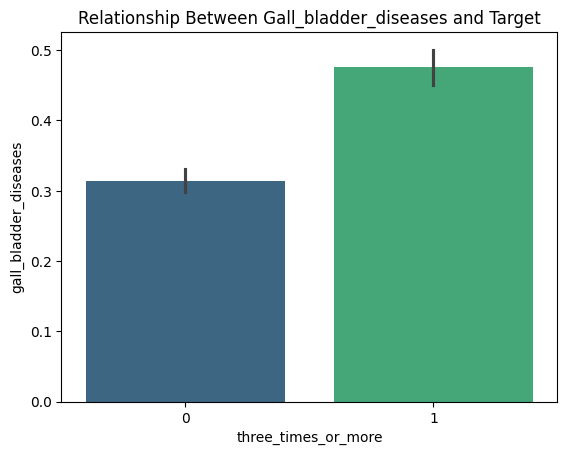

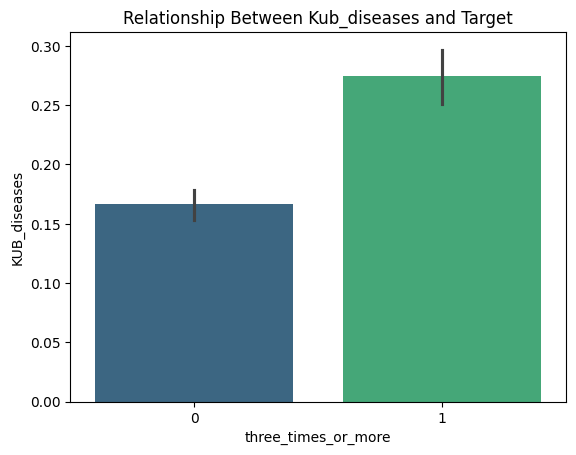

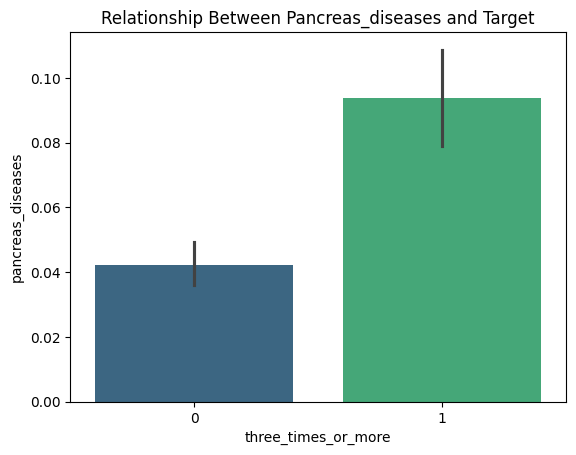

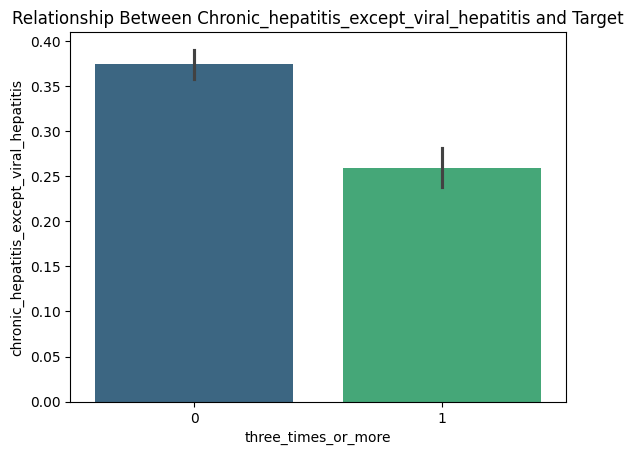

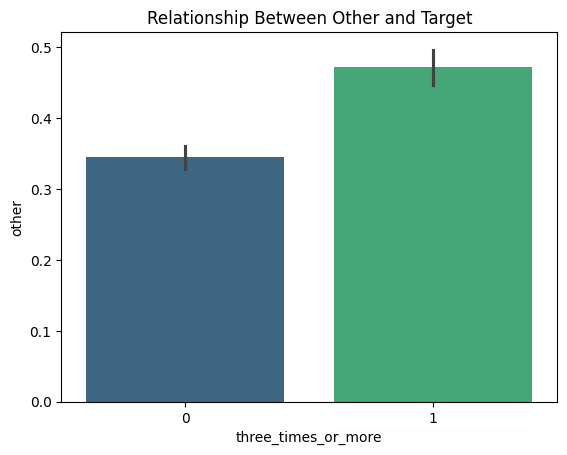

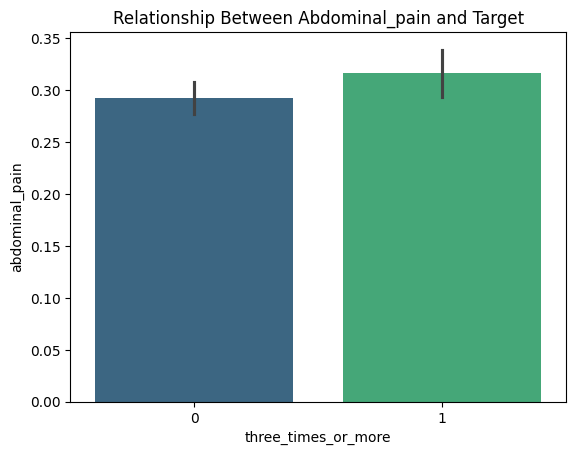

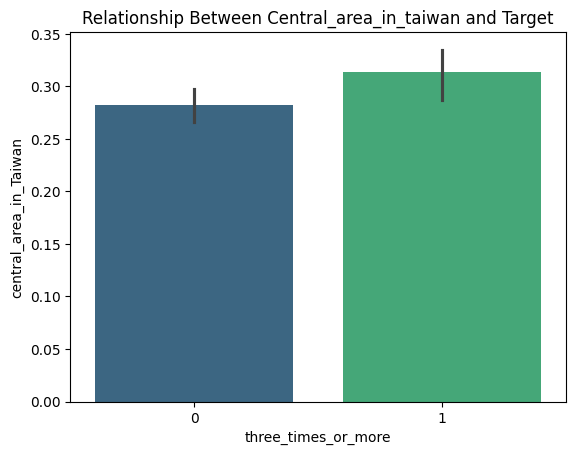

"\nÖzniteliklere göre hasta 2 yıl boyunca 3'ten az mı ultrasona görünmüş fazla mı, bunun bilgileri\n"

In [13]:
for column in df.drop(columns=['three_times_or_more']).columns:
    sns.barplot(x='three_times_or_more', y=column, data=df, palette='viridis', hue= 'three_times_or_more', legend=False)
    plt.title(f"Relationship Between {column.capitalize()} and Target")
    plt.show()

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26) # Verisetinin train ve test olarak ayrılması

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3696, 12) (925, 12) (3696,) (925,)


In [17]:
#Makine Öğrenmesi Modellerinin import edilmesi
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
ml_models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=26),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=26),
     'AdaBoostClassifier': AdaBoostClassifier(random_state=26),
    'RandomForestClassifier': RandomForestClassifier(random_state=26),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                   random_state=26)
}

In [19]:
def train_model(ml_models: dict):
  model_predictions = {}

  for model_name, model in ml_models.items():
    print(f"Training: {model_name}...")
    model.fit(X_train, y_train)
    model_predictions[model_name] = model.predict(X_test)
  return model_predictions

In [20]:
model_predictions = train_model(ml_models)

Training: GradientBoostingClassifier...
Training: ExtraTreesClassifier...
Training: AdaBoostClassifier...
Training: RandomForestClassifier...
Training: XGBClassifier...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:05:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [21]:
# Metriklerin import edilmesi
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, cohen_kappa_score

In [22]:
def evaluate_model(model_predictions):
  model_metrics = []
  for model_name, y_pred in model_predictions.items():
    metrics = {
              'Model Name': model_name,
              'accuracy': accuracy_score(y_test, y_pred),
              'f1': f1_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred),
              'sensitivity': recall_score(y_test, y_pred),
              'kappa': cohen_kappa_score(y_test, y_pred)
              }

    model_metrics.append(metrics)
  return model_metrics

In [23]:
model_metrics = evaluate_model(model_predictions)

En iyi Modelin Seçimi

In [24]:
def select_best_model(model_metrics):
  best_acc = 0
  best_model = {}

  for metric in model_metrics:
    if best_acc < metric['accuracy']:
      if len(best_model) > 0:
        best_model.clear()
      best_acc = metric['accuracy']
      best_model[metric['Model Name']] = best_acc

  return best_model

In [25]:
best_model_name = list(select_best_model(model_metrics).keys())[0]
best_model_name # En iyi modelin bulunması

'AdaBoostClassifier'

En iyi makine öğrenmesi modeli AdaBoostClassifier Bulundu

In [26]:
# GridSearch Parametreleri
param_grids = {
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

In [27]:
from sklearn.model_selection import GridSearchCV
def optimize_best_model(best_model_name, X_train, y_train, param_grids):
  best_model = ml_models[best_model_name]
  param_grid = param_grids[best_model_name]

  grid_search = GridSearchCV (
      estimator=best_model,
      param_grid=param_grid,
      cv=5,
      scoring='accuracy',
      n_jobs=-1,
      verbose=2
  )

  grid_search.fit(X_train, y_train)
  print(f"Best parameters for {best_model_name}:")
  print(grid_search.best_params_)
  print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

  return grid_search

In [28]:
best_model_optimized = optimize_best_model(best_model_name, X_train, y_train, param_grids)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters for AdaBoostClassifier:
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Best cross-validation score: 0.7094


In [29]:
y_pred_optimized = best_model_optimized.predict(X_test)
optimized_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_optimized),
    'f1': f1_score(y_test, y_pred_optimized),
    'precision': precision_score(y_test, y_pred_optimized),
    'sensitivity': recall_score(y_test, y_pred_optimized),
    'kappa': cohen_kappa_score(y_test, y_pred_optimized)
}

In [30]:
print("\nOptimized Model Metrics:")
for metric, value in optimized_metrics.items():
    print(f"{metric}: {value:.4f}")


Optimized Model Metrics:
accuracy: 0.7049
f1: 0.3292
precision: 0.6147
sensitivity: 0.2248
kappa: 0.1894


In [31]:
def plot_roc_curves(models_dict, X_test, y_test):

    plt.figure(figsize=(10, 8))

    plt.style.use('default')

    colors = ['blue', 'red']

    for (name, model), color in zip(models_dict.items(), colors):
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        except AttributeError:
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test)[:, 1]
            else:
                y_pred_proba = model.predict(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        plt.plot(fpr, tpr, color=color, lw=2,
                label=f'{name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
             label='Random (AUC = 0.500)')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    plt.title('ROC Curves - Original vs Optimized Model', fontsize=14, pad=20)

    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

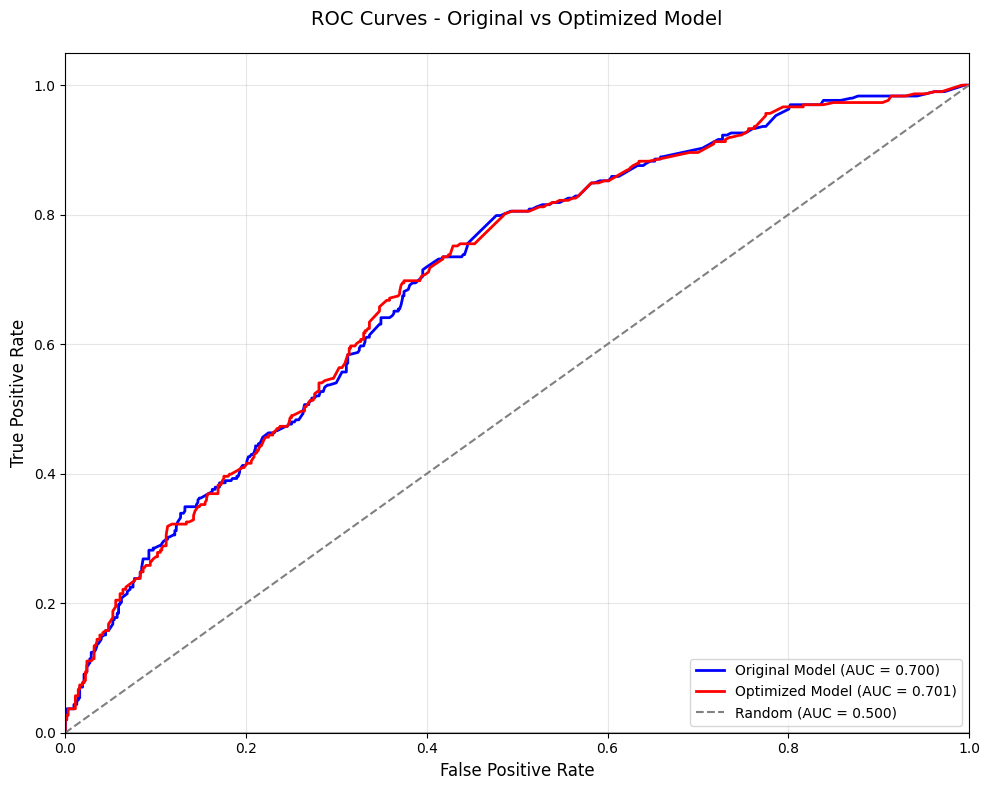


Model Performance Comparison:
------------------------------------------------------------
           Original Model  Optimized Model
Accuracy           0.7016           0.7049
Precision          0.6019           0.6147
Recall             0.2181           0.2248
F1 Score           0.3202           0.3292
Kappa              0.1796           0.1894


In [32]:
models_to_compare = {
    'Original Model': ml_models[best_model_name],  # Before Grid Search 
    'Optimized Model': best_model_optimized        # After Grid Search
}

plot_roc_curves(models_to_compare, X_test, y_test)
print("\nModel Performance Comparison:")
print("-" * 60)
y_pred_original = model_predictions['AdaBoostClassifier']

comparison_df = pd.DataFrame({
    'Original Model': [
        accuracy_score(y_test, y_pred_original),    # Doğruluk
        precision_score(y_test, y_pred_original),   # Kesinlik
        recall_score(y_test, y_pred_original),      # Duyarlılık
        f1_score(y_test, y_pred_original),         # F1 Skoru
        cohen_kappa_score(y_test, y_pred_original)  # Kappa Değeri
    ],
    'Optimized Model': [
        accuracy_score(y_test, y_pred_optimized),
        precision_score(y_test, y_pred_optimized),
        recall_score(y_test, y_pred_optimized),
        f1_score(y_test, y_pred_optimized),
        cohen_kappa_score(y_test, y_pred_optimized)
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa'])

print(comparison_df.round(4))

In [33]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau 

def train_dense_model(X_train, y_train, X_valid, y_valid):
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=50, 
        batch_size=32, 
        callbacks=[early_stopping, reduce_lr],
        verbose=1

    )

    return model, history


In [34]:
from keras.layers import  Conv1D, Flatten

def train_conv_model(X_train, y_train, X_valid, y_valid):
    
    X_train_reshaped = np.expand_dims(X_train, axis=2)  
    X_valid_reshaped = np.expand_dims(X_valid, axis=2) 


    model = Sequential([
       
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        
        Dropout(0.3),

       
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),  
        loss='binary_crossentropy',  
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    history = model.fit(
        X_train_reshaped, y_train, 
        validation_data=(X_valid_reshaped, y_valid), 
        epochs=50,  
        batch_size=32, 
        callbacks=[early_stopping, reduce_lr], 
        verbose=1  
    )

    return model, history


In [35]:
from keras.layers import LeakyReLU  

def train_leaky_relu_model(X_train, y_train, X_valid, y_valid):
    
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1]),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        Dense(32),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        Dense(16),
        LeakyReLU(alpha=0.1),
        # Dropout katmanı
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])


    model.compile(
        optimizer=Adam(learning_rate=0.001),  
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Modeli eğitiyoruz
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_valid, y_valid), 
        epochs=50,  
        batch_size=32,  
        callbacks=[early_stopping, reduce_lr],  
        verbose=1 
    )

    return model, history


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def compare_models(models, X_test, y_test):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'AUC']
    results = {metric: [] for metric in metrics}
    model_names = []

    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        # Tahmin yap
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        y_pred_proba = model.predict(X_test).flatten()

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        # Sonuçları sakla
        results['Accuracy'].append(acc)
        results['Precision'].append(prec)
        results['Recall'].append(rec)
        results['F1 Score'].append(f1)
        results['Kappa'].append(kappa)
        results['AUC'].append(auc)
        model_names.append(model_name)

        plot_roc_curves(model, X_test, y_test)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    comparison_df = pd.DataFrame(results, index=model_names)
    print("\nModel Performance Comparison:")
    print("-" * 60)
    print(comparison_df.round(4))

    best_model_name = comparison_df['AUC'].idxmax()
    print(f"\nBest Model: {best_model_name}")

    return best_model_name, comparison_df


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6678 - loss: 0.6408 - val_accuracy: 0.6886 - val_loss: 0.5897 - learning_rate: 0.0010
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - loss: 0.5955 - val_accuracy: 0.6886 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6946 - loss: 0.5847 - val_accuracy: 0.6919 - val_loss: 0.5828 - learning_rate: 0.0010
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7108 - loss: 0.5762 - val_accuracy: 0.6930 - val_loss: 0.5768 - learning_rate: 0.0010
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7068 - loss: 0.5709 - val_accuracy: 0.6908 - val_loss: 0.5789 - learning_rate: 0.0010
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7063 - loss: 0.5704 - val_accuracy: 0.6843 - val_loss: 0.5774 - learning_rate: 0.0010
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5603 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6800 - loss: 0.6337 - val_accuracy: 0.6908 - val_loss: 0.5909 - learning_rate: 0.0010
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7127 - loss: 0.5726 - val_accuracy: 0.6789 - val_loss: 0.5873 - learning_rate: 0.0010
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7150 - loss: 0.5721 - val_accuracy: 0.6930 - val_loss: 0.5892 - learning_rate: 0.0010
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6982 - loss: 0.5856 - val_accuracy: 0.6984 - val_loss: 0.5768 - learning_rate: 0.0010
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5716 - val_accuracy: 0.6973 - val_loss: 0.5749 - learning_rate: 0.0010
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7076 - loss: 0.5742 - val_accuracy: 0.6984 - val_loss: 0.5750 - learning_rate: 0.0010
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.5740 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6000 - loss: 0.6679 - val_accuracy: 0.6800 - val_loss: 0.6012 - learning_rate: 0.0010
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.5847 - val_accuracy: 0.6886 - val_loss: 0.5801 - learning_rate: 0.0010
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 0.5687 - val_accuracy: 0.6973 - val_loss: 0.5767 - learning_rate: 0.0010
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5792 - val_accuracy: 0.6962 - val_loss: 0.5773 - learning_rate: 0.0010
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5758 - val_accuracy: 0.6973 - val_loss: 0.5770 - learning_rate: 0.0010
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.5661 - val_accuracy: 0.6951 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6887 - loss: 0.5839 - val_accurac

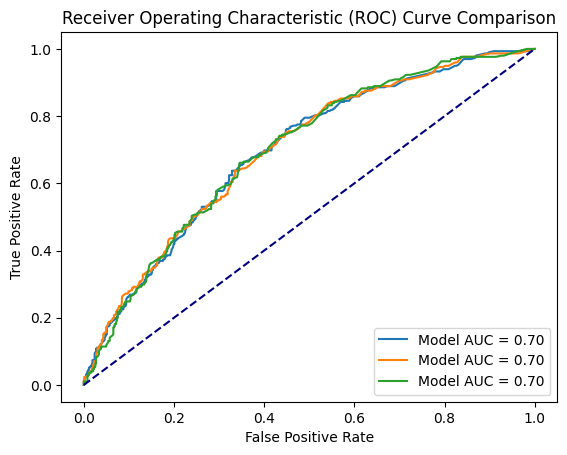

------------------------------------------------------------
Model 1 Results:
accuracy: 0.6930
f1_score: 0.3140
precision: 0.5603
sensitivity: 0.2181
roc_auc: 0.5684
kappa: 0.1629


------------------------------------------------------------
Model 2 Results:
accuracy: 0.6973
f1_score: 0.3805
precision: 0.5584
sensitivity: 0.2886
roc_auc: 0.5901
kappa: 0.2063


------------------------------------------------------------
Model 3 Results:
accuracy: 0.6897
f1_score: 0.3402
precision: 0.5401
sensitivity: 0.2483
roc_auc: 0.5739
kappa: 0.1723


best dl acc {'accuracy': 0.6972972972972973, 'f1_score': 0.3805309734513274, 'precision': 0.5584415584415584, 'sensitivity': 0.28859060402684567, 'roc_auc': 0.5900688267343159, 'kappa': 0.20629083465107434}


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_models(models, histories, X_valid, y_valid):
    results = []

    for model, history in zip(models, histories):
        # Model predictions
        y_pred = (model.predict(X_valid) > 0.5).astype("int32")

        # Calculate metrics
        accuracy = accuracy_score(y_valid, y_pred)
        f1 = f1_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred)
        sensitivity = recall_score(y_valid, y_pred)
        roc_auc = roc_auc_score(y_valid, y_pred)
        kappa = cohen_kappa_score(y_valid, y_pred)

        # Store results
        results.append({
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'sensitivity': sensitivity,
            'roc_auc': roc_auc,
            'kappa': kappa
        })

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_valid, model.predict(X_valid))
        roc_auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Model AUC = {roc_auc_value:.2f}')

    # Plot ROC curve comparison
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return results

# Model and history examples (using the previous functions)
models = []
histories = []

# Add models to the list
model_1, history_1 = train_dense_model(X_train, y_train, X_test, y_test)
model_2, history_2 = train_conv_model(X_train, y_train, X_test, y_test)
model_3, history_3 = train_leaky_relu_model(X_train, y_train, X_test, y_test)

models.extend([model_1, model_2, model_3])
histories.extend([history_1, history_2, history_3])

# Call the evaluate function
results = evaluate_models(models, histories, X_test, y_test)
# Print results
for i, result in enumerate(results):
    print("-"*60)
    print(f"Model {i+1} Results:")
    for metric, value in result.items():
        dl_best_acc = max(results, key=lambda x: x['accuracy'])
        print(f"{metric}: {value:.4f}")
    print("\n")
print(f'best dl acc {dl_best_acc}')

Derin öğrenme

In [38]:
def compare_all_models(y_test, models_dict):

    results = {}

    for model_name, predictions in models_dict.items():
        results[model_name] = {
            'Accuracy': accuracy_score(y_test, predictions),
            'F1': f1_score(y_test, predictions),  # F1 Score yerine F1 kullanıldı
            'Precision': precision_score(y_test, predictions),
            'Recall': recall_score(y_test, predictions),
            'Kappa': cohen_kappa_score(y_test, predictions)
        }

    results_df = pd.DataFrame(results).round(4)

    best_model = results_df.loc['F1'].idxmax()

    print("Tüm Modellerin Karşılaştırması:")
    print("-" * 60)
    print(results_df)
    print("\nEn İyi Model:", best_model)
    print(f"Accuracy Skoru: {results_df.loc['Accuracy', best_model]:.4f}")

    return results_df, best_model


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-40-eb90f4973bed>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df,


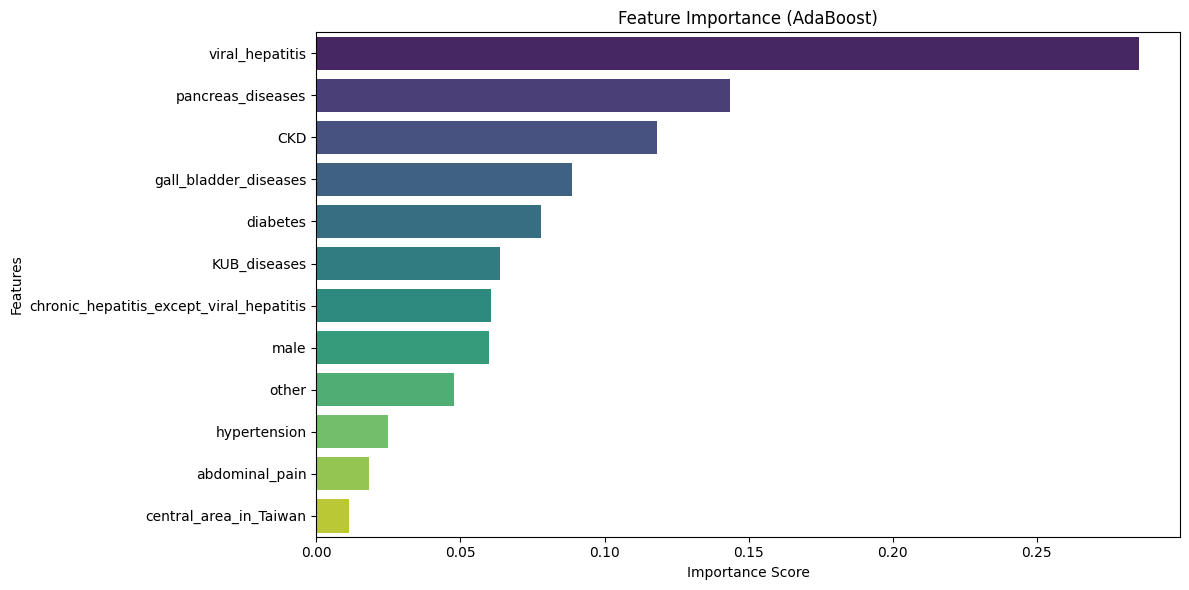


Top 5 Most Important Features:
--------------------------------------------------
viral_hepatitis: 0.2854
pancreas_diseases: 0.1436
CKD: 0.1183
gall_bladder_diseases: 0.0886
diabetes: 0.0778


In [40]:
def analyze_adaboost_importance(X, y, feature_names=None):

    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

    ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
    ada_model.fit(X, y)

    importance_scores = ada_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))

    sns.barplot(data=feature_importance_df,
                x='Importance',
                y='Feature',
                palette='viridis')
    plt.title('Feature Importance (AdaBoost)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 Most Important Features:")
    print("-" * 50)
    for _, row in feature_importance_df.head().iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")

    return feature_importance_df


feature_names = X_train.columns if hasattr(X_train, 'columns') else None
importance_results = analyze_adaboost_importance(X_train_scaled, y_train, feature_names)

In [41]:

def select_top_features_adaboost(X_train, X_test, importance_df, top_n=5):
    top_features = importance_df.nlargest(top_n, 'Importance')['Feature'].tolist()

    if hasattr(X_train, 'loc'):
        X_train_selected = X_train.loc[:, top_features]
        X_test_selected = X_test.loc[:, top_features]
    else:
        feature_indices = [list(importance_df['Feature']).index(feat) for feat in top_features]
        X_train_selected = X_train[:, feature_indices]
        X_test_selected = X_test[:, feature_indices]

    print(f"\nSelected top {top_n} features:")
    for feat in top_features:
        print(f"- {feat}")

    return X_train_selected, X_test_selected
X_train_selected, X_test_selected = select_top_features_adaboost(
    X_train_scaled, X_test_scaled, importance_results, top_n=5)


Selected top 5 features:
- viral_hepatitis
- pancreas_diseases
- CKD
- gall_bladder_diseases
- diabetes


In [42]:
def predict_single_sample(model, new_data, feature_names=None):
    new_data = np.array(new_data).reshape(1, -1)

    # Tahmin yap
    prediction = model.predict(new_data)[0]
    probability = model.predict_proba(new_data)[0]

    # Sonuçları yazdır
    print("\nTahmin Sonuçları:")
    print("-" * 50)
    print(f"Tahmin Edilen Sınıf: {prediction}")
    print(f"Tahmin Olasılığı: {max(probability):.4f}")

    # Öznitelik değerlerini göster
    if feature_names is not None:
        print("\nGirilen Değerler:")
        print("-" * 50)
        for name, value in zip(feature_names, new_data[0]):
            print(f"{name}: {value}")

    return prediction, max(probability)


# Model oluştur ve eğit
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

# Öznitelik isimlerini al (eğer varsa)
feature_names = X_train.columns if hasattr(X_train, 'columns') else None

new_sample_list = [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
prediction_list, prob_list = predict_single_sample(adaboost_model, new_sample_list, feature_names)



Tahmin Sonuçları:
--------------------------------------------------
Tahmin Edilen Sınıf: 0
Tahmin Olasılığı: 0.5687

Girilen Değerler:
--------------------------------------------------
male: 1
diabetes: 0
hypertension: 1
CKD: 0
viral_hepatitis: 0
gall_bladder_diseases: 0
KUB_diseases: 1
pancreas_diseases: 0
chronic_hepatitis_except_viral_hepatitis: 0
other: 0
abdominal_pain: 1
central_area_in_Taiwan: 1


In [43]:
def predict_ultrasound_status(model, input_values):
    # Girdiyi numpy dizisine çevir ve reshape et
    input_array = np.array(input_values).reshape(1, -1)

    # Tahmin yap
    prediction = model.predict(input_array)[0]
    probability = model.predict_proba(input_array)[0]

    # Sonucu hazırla
    if prediction == 0:
        result = "Hasta 3'ten az ultrasonografi almıştır"
    else:
        result = "Hasta en az 3 ultrasonografi almıştır"

    print(f"\nTahmin Sonucu: {result}")

    return result
örnek_veri = [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
sonuc = predict_ultrasound_status(adaboost_model, örnek_veri)


Tahmin Sonucu: Hasta en az 3 ultrasonografi almıştır
